## Adding noise to .wav snippets and converting them to spectrograms
Most of the functions and logic follows from the making_spectrograms notebook, 
reference it for the extended documentation

In [5]:
import numpy as np
import librosa
import librosa.display
import math

from os import listdir

#### Example of raw signal

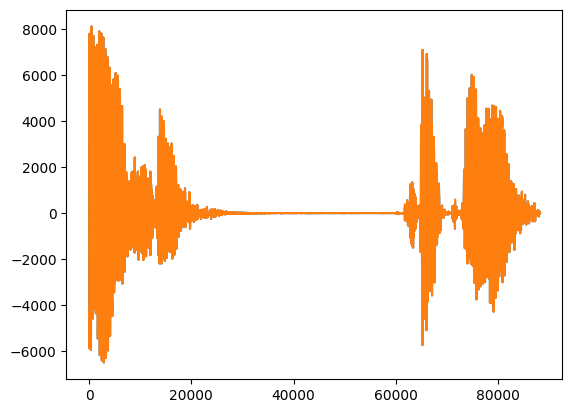

In [2]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

split_dir = 'time_machine_split'
input_data = read(f'{split_dir}/s_7.wav')
audio = input_data[1]
plt.plot(audio)

In [46]:
y, sr = librosa.load("time_machine_split/s_7.wav")[0], 44100

## Gaussian noise
We will add gaussian noise based on the RMS of the signal itself

In [30]:
def noise_rms(y):
    '''
    y: signal from librosa.load(filepath) tuple
    '''
    return math.sqrt(np.mean(y**2))

In [40]:
def snoise(y, scale=1):
    '''
    y: signal from librosa.load(filepath) tuple,
    scale helps us scale the noise down and adjust it to our use
    '''
    
    rms = noise_rms(y)
    return np.random.normal(0,rms*scale,y.shape[0])

In [41]:
def with_noise(y_real, scale=1):
    '''
    y_real: signal we add noise to, the real data
    scale: the scale that goes into the snoise() function
    '''
    return y_real+snoise(y_real,scale)

### applying our functions

In [73]:
ny = with_noise(y,0.05)
S = librosa.feature.melspectrogram(y=ny, sr=sr)

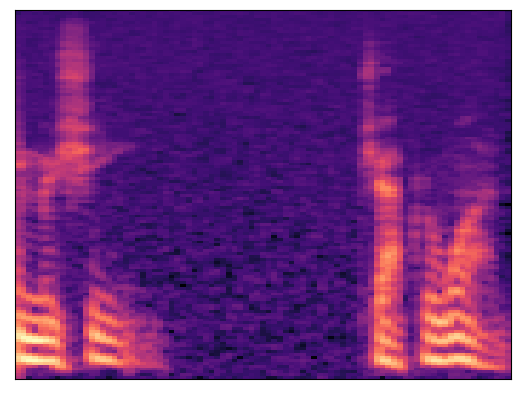

In [74]:
import matplotlib.pyplot as plt


S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure()
librosa.display.specshow(S_dB)

# plt.savefig("original_sg/s_7.jpg")
plt.show()
plt.close()

## Mass generating spectrograms with added noise

In [64]:
def generate_noise_sg(file_name:str, source_dir:str, target_dir:str, scale:float, save=False):
    '''
    generates a spectrogram with added noise
    
    file_name: name of the file 
    source_dir: source directory for the .wav files
    target_dir: target directory spectrograms are saved
    scale: scaling factor that scales the RMS in the noise (part of snoise())
    save: when unchanged it displays the image, when true it saves it to the target directory
    '''
    
    wav_name = source_dir + '/' + file_name
    y, sr = librosa.load(wav_name)[0], 44100
    ny = with_noise(y,scale)
    S = librosa.feature.melspectrogram(y=ny, sr=sr)
    
    S_dB = librosa.power_to_db(S, ref=np.max)

    plt.figure()
    librosa.display.specshow(S_dB)

    if save==True:
        pic_name = target_dir + '/' + file_name.replace('.wav','.jpg')
        plt.savefig(pic_name)
        plt.close()
    else:
        plt.show()
    

In [65]:
generate_noise_sg('s_0.wav', 'time_machine_split', 'snoise_sg', 0.05, save=True)

In [66]:
def save_all_noise_sg(source_dir,target_dir, scale):    
    '''
    takes all the files in the source_dir and generates their spectrograms inside
    target_dir, scale scales RMS in the noise (part of snoise())
    '''
    
    splits_list = listdir(source_dir)
    for filename in splits_list:
        generate_noise_sg(filename, source_dir, target_dir, scale, save=True)

In [75]:
save_all_noise_sg('time_machine_split','snoise_sg',0.05)